# Clean Water

### About

- `ph`: pH of 1. water (0 to 14). --> [6.5 - 8.5]

- `Hardness`: Capacity of water to precipitate soap in mg/L. --> [0 - 300]

- `Solids`: Total dissolved solids in ppm. --> [0 - 500]

- `Chloramines`: Amount of Chloramines in ppm. --> [0 - 4]

- `Sulfate`: Amount of Sulfates dissolved in mg/L. --> [0 - 250]

- `Conductivity`: Electrical conductivity of water in μS/cm. --> [200 - 800]

- `Organic_carbon`: Amount of organic carbon in ppm. --> [0 - 25]

- `Trihalomethanes`: Amount of Trihalomethanes in μg/L. --> [0 - 100]

- `Turbidity`: Measure of light emiting property of water in NTU. --> [ < 5] Ideally below 1

- `Potability`: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

## 1. Data & Libraries

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go

# statistics
from scipy import stats
from scipy.stats import ttest_ind

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
# load data
df = pd.read_csv('../raw_data/water_potability.csv')

In [3]:
# display top 5 rows
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## 2. Exploratory Data Analysis

In [4]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# drop duplicates
df.drop_duplicates()

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

**Observation:** there are no duplicated entries.

In [6]:
# check missing data
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:
# drop null values & rename df to data
df.dropna(inplace=True)

# check shape after dropping na
df.shape

(2011, 10)

**Observation:** After dropping `na` we have lost 38% of our initial dataset. That is a significant loss.

In [8]:
# descriptive statistics
round(df.describe().T, 2)

count      mean      std     min       25%       50%  \
ph               2011.0      7.09     1.57    0.23      6.09      7.03   
Hardness         2011.0    195.97    32.64   73.49    176.74    197.19   
Solids           2011.0  21917.44  8642.24  320.94  15615.67  20933.51   
Chloramines      2011.0      7.13     1.58    1.39      6.14      7.14   
Sulfate          2011.0    333.22    41.21  129.00    307.63    332.23   
Conductivity     2011.0    426.53    80.71  201.62    366.68    423.46   
Organic_carbon   2011.0     14.36     3.32    2.20     12.12     14.32   
Trihalomethanes  2011.0     66.40    16.08    8.58     55.95     66.54   
Turbidity        2011.0      3.97     0.78    1.45      3.44      3.97   
Potability       2011.0      0.40     0.49    0.00      0.00      0.00   

                      75%       max  
ph                   8.05     14.00  
Hardness           216.44    317.34  
Solids           27182.59  56488.67  
Chloramines          8.11     13.13  
Sulfate            359.33    481.03  
Conductivity       482.37    753.34  
Organic_carbon      16.68     27.01  
Trihalomethanes     77.29    124.00  
Turbidity            4.51      6.49  
Potability           1.00      1.00

In [9]:
# potability split 
distr = df.copy()
distr.Potability =  distr.Potability.map({1:'Potable', 0:'Not Potable'})
ex.pie(distr, names='Potability', title='Sample Split', height=400, width=400)

**Observation:** We see that we have some degree of unbalancedness in our data; we will not apply any upsampling/downsampling methodology as the proportions are more close to equal than to be extremely balanced (cases like 90% / 10% where upsampling is crucial). Also, the more significant label ("Not potable") is the one with more samples; logically, we would prefer a model that will have more false negatives rather than a model that has more false positives.

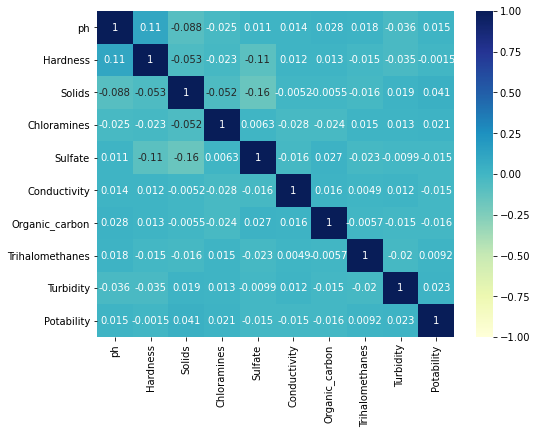

In [10]:
# correlation and heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu");

**Observation:** It appears that there is no linear correlation between the output label and our features, mostly because we have a binary label and continuous features. Traditional linear correlation coefficients won't tell us the true relationships between features and the target variable.

### 2.1 Statistical Significance

To solve the correlation issue above, we will test for statistical significance between potable and non-potable samples. Therefore our hypotheses are:

- *H0*: there is no difference between potable and non-potable sample.
- *H1*: there is a difference between potable and non-potable sample.

- alpha = 0.05

First, let's check how each feature mean looks like.

In [11]:
# potability mean by feature
data = df.groupby('Potability').mean()
data

ph    Hardness        Solids  Chloramines     Sulfate  \
Potability                                                                
0           7.067201  196.008440  21628.535122     7.107267  333.742928   
1           7.113791  195.908341  22344.922883     7.174395  332.457832   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             427.554342       14.400250        66.278712   3.955181  
1             425.005423       14.294764        66.581596   3.991254

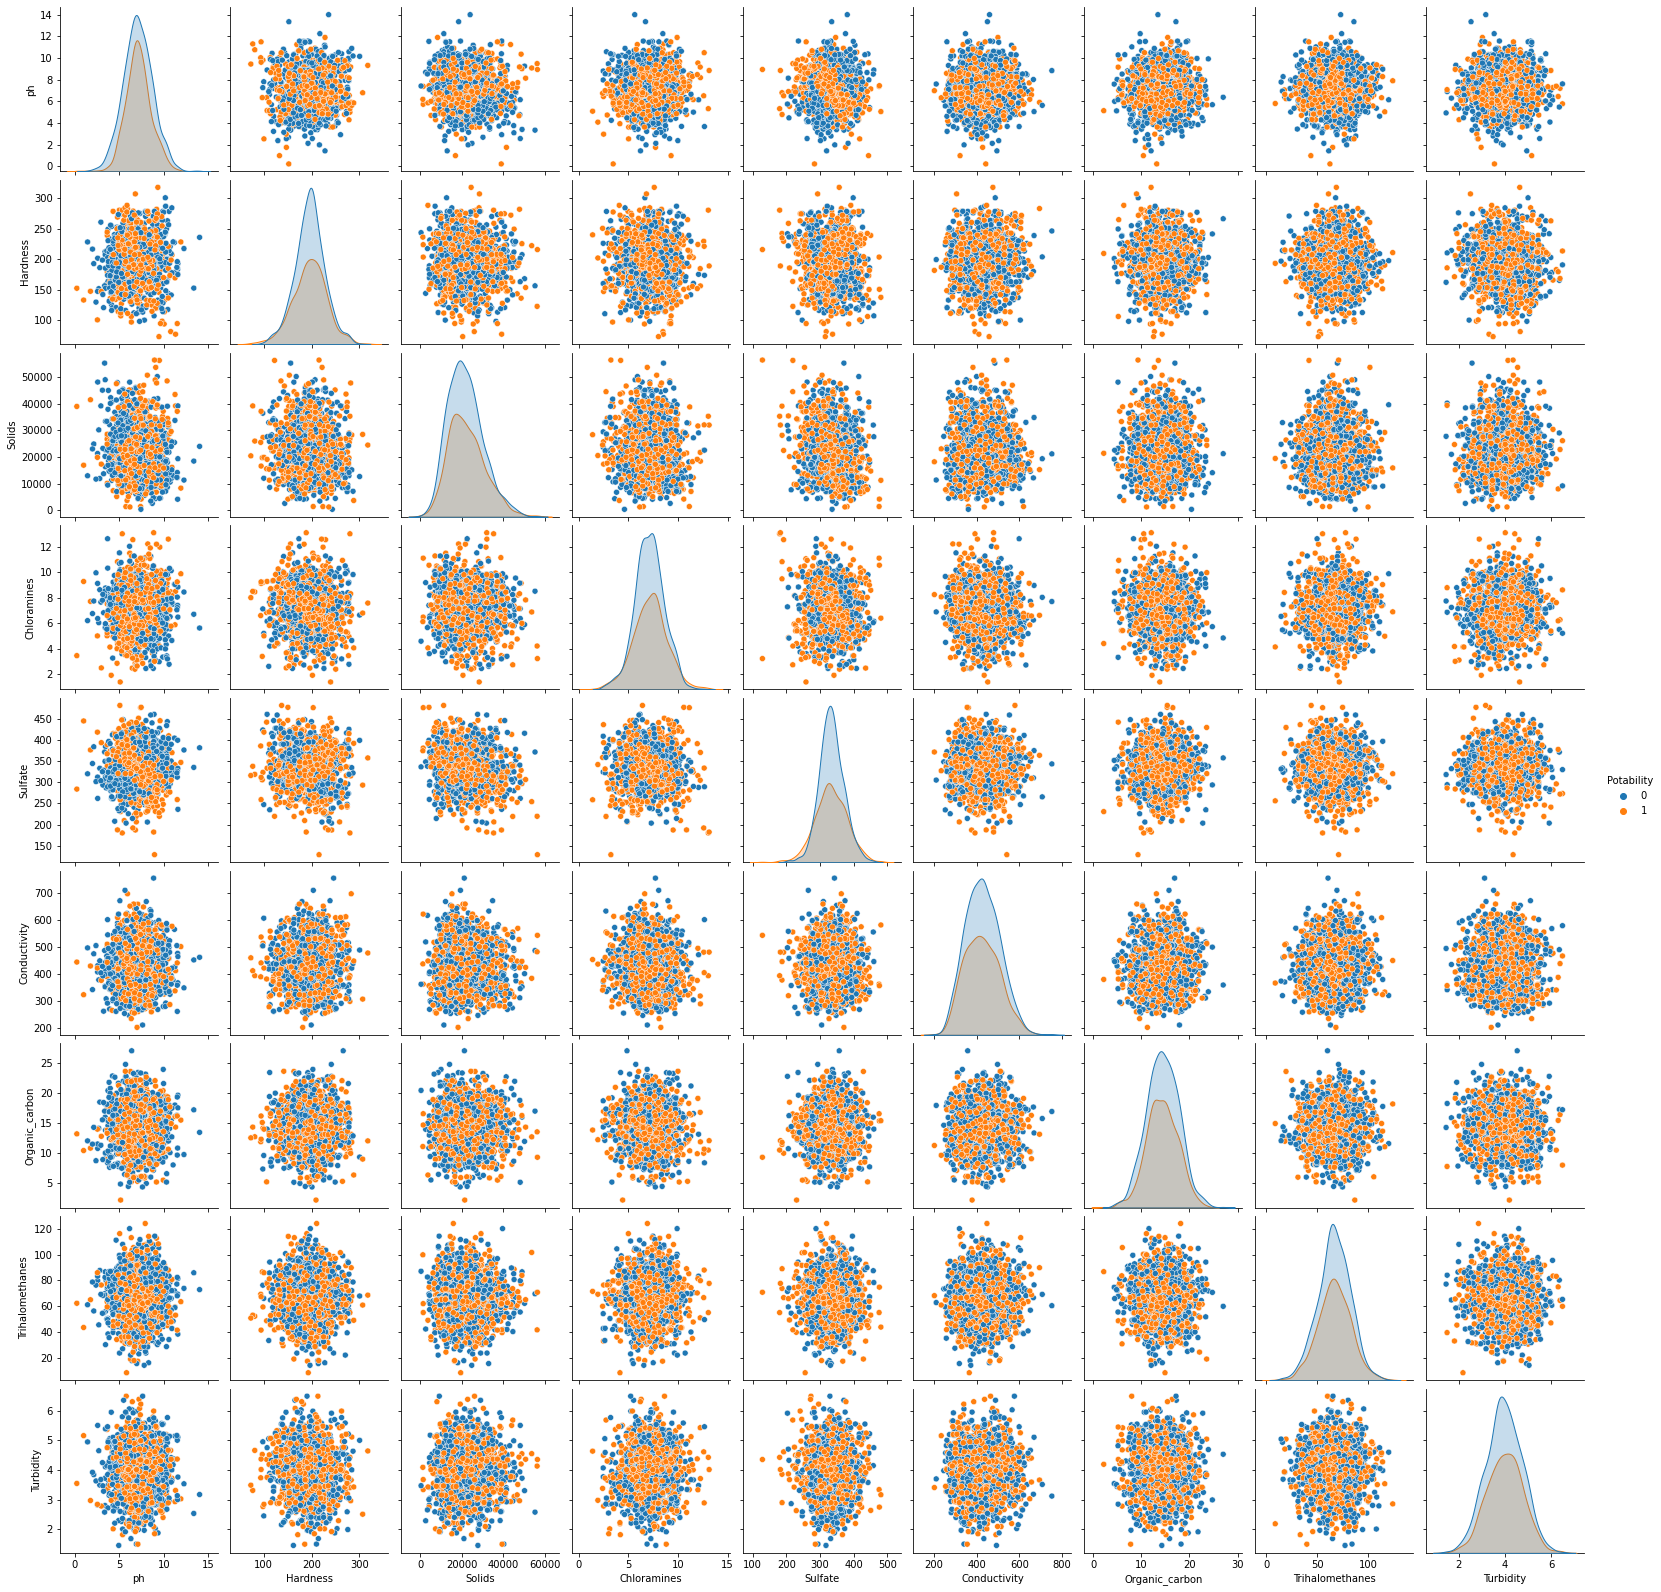

In [12]:
# pairplot distribution
sns.pairplot(df, hue='Potability');

In [13]:
# check if means are statistically different
non_potable = df.query('Potability == 0')
potable     = df.query('Potability == 1')

In [14]:
ttest_results_pvalues = []
ttest_results_statistic = []

for ax,col in enumerate(df.columns[:9]):
    statistic, pvalue = ttest_ind(non_potable[col], potable[col])
    ttest_results_pvalues.append(pvalue)
    ttest_results_statistic.append(statistic)
    
ttest_res_df = pd.DataFrame({'S': ttest_results_statistic,
                             'P': ttest_results_pvalues,
                             'F': df.columns[:9]})

ttest_res_df = ttest_res_df.sort_values(by='P')

**Explanation:** In order to test for any significant difference between "potable" and "non-potable" water samples, we will treat both labels as two separate populations from which we sampled 'n' and 'k' samples (n = the number of "potable" samples, 'k' = the number of "non-potable" samples). We will perform a two-tailed t-test to check if there is any significant difference between the two sample means, considering the sample size differences and unequal variance. We expect to see low p-values for the features that indeed are significantly different between the labels. We will set our significance level alpha to be equal to or less than 0.1.

In [15]:
tr  = go.Bar(x=ttest_res_df['F'], y=ttest_res_df['P'], name='P Value')
tr2 = go.Bar(x=ttest_res_df['F'], y=ttest_res_df['S'], name='F Statistic')

data_temp = [tr2, tr]
fig = go.Figure(data=data_temp,layout={'title': 'T-test per Feature',
                                  'barmode': 'overlay'})
fig.show()

**Observation:** After performing the two-tailed t-test, we see that none of the features have p-values below the alpha value (0.05). These result suggest that there is no difference between potable and non-potable water given the features above.

This seems a bit strange, so it would be important to ask whether there a problem with the dataset. Nevertheless, for the sake of learning, let's proceed.

## 3. Modelling

First, let's run a baseline model using what we have so far.

In [16]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [19]:
# Create the feature set
X = df[['ph', 'Hardness', 'Solids', 'Chloramines',
          'Sulfate', 'Conductivity', 'Organic_carbon', 
          'Trihalomethanes', 'Turbidity']]

y = df['Potability']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instanciate model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X_train, y_train, cv=5)

# Mean of accuracies
acc_logres = cv_results['test_score'].mean()

acc_logres

0.5977310012367179

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Instanciate model
rf = RandomForestClassifier(n_estimators=100)

# train the model
rf.fit(X_train, y_train)

rf.score(X_train, y_train)

acc_rf = rf.score(X_train, y_train)

acc_rf

1.0

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Instanciate model
dtc = DecisionTreeClassifier()

# 5-Fold Cross validate model
cv_results = cross_validate(dtc, X_train, y_train, cv=5)

# Mean of accuracies
acc_dtrees = cv_results['test_score'].mean()

acc_dtrees

0.5849423285631358

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciate model
knn = KNeighborsClassifier(n_neighbors = 3)

# train the model
knn.fit(X_train, y_train)

# predict using the test set
acc_knn = knn.score(X_train, y_train)

acc_knn

0.7398720682302772

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=1500,
                                 learning_rate=1,
                                 max_depth=1).fit(X_train, y_train)

acc_gbc = gbc.score(X_train, y_train)

acc_gbc

0.914001421464108

## 4. Model Evaluation

In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree', 'Random Forest',
              'KNN', 'Gradient Boosting Classifier'],
    'Score': [acc_logres, acc_dtrees, acc_rf,
              acc_knn, acc_gbc]})

models.sort_values(by='Score', ascending=False)

Model     Score
2                 Random Forest  1.000000
4  Gradient Boosting Classifier  0.914001
3                           KNN  0.739872
0           Logistic Regression  0.597731
1                 Decision Tree  0.584942

## 5. Hyperparameter Tuning

## X. Predict

In [52]:
# predict results
y_pred = gbc.predict(X_test)